In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from astropy.io import ascii
from astropy.table import Column
from scipy import optimize

-> Respuesta espectral del detector para una muestra monoenergética de rayos gamma. Obtener en primer lugar el espectro de fondo del laboratorio durante 5 minutos y, a continuación, el espectro de la muestra radiactiva de 137Cs durante 5 minutos. Para calibrar en energía el detector, utilizar el espectro de 22Na que se proporciona.

In [13]:
espectro_sodio = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Nanoabsorbente.txt')
background = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Background.txt')

canales = np.arange(0, len(espectro_sodio))

#Corregimos el espectro de sodio restándole el ruido de fondo

espectro_sodio = espectro_sodio['0'] - background['0']

In [14]:
#Cargamos la función con la que vamos a ajustar los datos con una gaussiana

def test_func(x, a, mu, sigma):
    return a * np.exp(-1/(2*sigma**2)*(x-mu)**2)

72.8419011382959


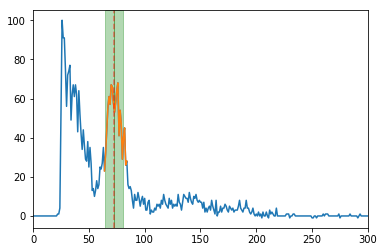

In [15]:
#Procedemos a la calibración canales-energías sabiendo que en el espectro de sodio encontraremos un pico en energías
#causada por la aniquilación de pares con energía conocida de 511 keV

plt.plot(canales, espectro_sodio)
plt.plot(canales[64:85], espectro_sodio[64:85])
plt.xlim(0,300)

#Hacemos la llamada a la función para el ajuste a la gaussiana en el intervalo buscado

params, params_covariance = optimize.curve_fit(test_func,canales[64:85] , espectro_sodio[64:85], p0=[70, 75, 10])

a, mu, sigma = params

plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red')
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green' )
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
print(mu)

In [16]:
#Calibración lineal de las energías en kiloelectronvoltios

energias = 511/mu*canales

La energía del pico de aniquilación de pares cae en 511.00 keV


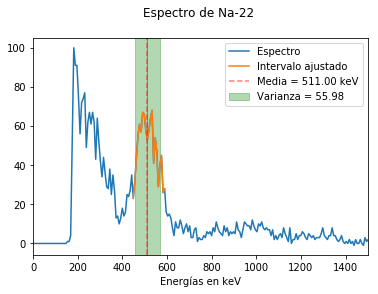

In [17]:
#Comprobamos la calibración estudiando que la media de la gaussiana del fotopico en el espectro de energías
#cae en 511 keV

plt.plot(energias, espectro_sodio, label = 'Espectro')
plt.plot(energias[64:85], espectro_sodio[64:85], label='Intervalo ajustado')
plt.xlim(0, 1500)

params, params_covariance = optimize.curve_fit(test_func,energias[64:85] , espectro_sodio[64:85], p0=[60, 500, 10])

a, mu, sigma = params

plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()
plt.title('Espectro de Na-22 \n')
plt.xlabel('Energías en keV')

print('La energía del pico de aniquilación de pares cae en {:.2f} keV'.format(mu))
plt.savefig('EspectroSodioCalibrado')

x Estudiar la forma del fotopico. Comprobar que su energía es de 662 keV y que se ajusta a una gaussiana. Hallar la resolución en energía del espectrómetro (en tanto por ciento, Delta(E)/E) para este pico.

In [18]:
#Cargamos el espectro de cesio (con 0 mm absorbente) y le restamos el ruido

espectro_Cesio0mmAl = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Csnoabsorbente.txt')

espectro_Cesio0mmAl = espectro_Cesio0mmAl['0'] - background['0']

La energía medida para el fotopico es 694.80 keV con una varianza de 54.55 keV
La resolución en energías del espectrómetro es 7.85 %
La altura del fotopico en su valor medio es a = 725.12


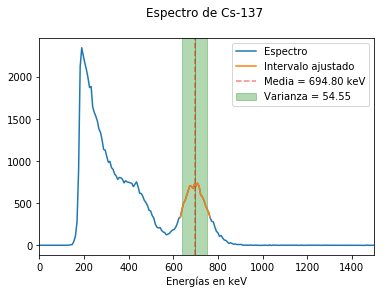

In [19]:
#Realizamos el ajuste por una gaussiana al fotopico del espectro del Cesio (ojalá que salga 622 keV)

plt.figure()

plt.plot(energias, espectro_Cesio0mmAl, label = 'Espectro')
plt.xlim(0,1500)
plt.plot(energias[90:110], espectro_Cesio0mmAl[90:110], label='Intervalo ajustado')


#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[90:110] ,espectro_Cesio0mmAl[90:110], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()

plt.title('Espectro de Cs-137 \n')
plt.xlabel('Energías en keV')
#plt.xscale('log')

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La resolución en energías del espectrómetro es {:.2f} %'.format(sigma/mu*100))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))

plt.savefig('FotopicoCesio')

La energía medida para el borde Compton es 409.51 keV con una varianza de 76.35 keV
La resolución en energías del espectrómetro es 18.64 %
La altura del fotopico en su valor medio es a = 744.11


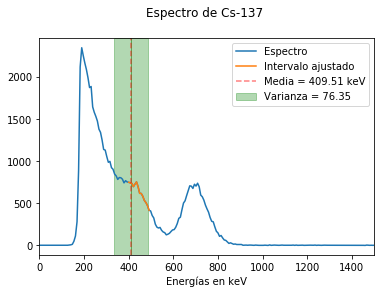

In [20]:
#Ajuste del borde Compton

plt.figure()

plt.plot(energias, espectro_Cesio0mmAl, label = 'Espectro')
plt.xlim(0,1500)
plt.plot(energias[57:71], espectro_Cesio0mmAl[57:71], label='Intervalo ajustado')


params_compt, params_covariance = optimize.curve_fit(test_func,energias[57:71] ,espectro_Cesio0mmAl[57:71], p0=[800, 450, 30])
a_compt, mu_compt, sigma_compt = params_compt


plt.axvline(mu_compt, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu_compt))
plt.axvspan(mu_compt-sigma_compt,mu_compt, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma_compt))
plt.axvspan(mu_compt,mu_compt+sigma_compt, alpha = 0.3, color = 'green' )
plt.legend()

plt.title('Espectro de Cs-137 \n')
plt.xlabel('Energías en keV')
#plt.xscale('log')

print('La energía medida para el borde Compton es {:.2f} keV con una varianza de {:.2f} keV'.format(mu_compt,sigma_compt))
print('La resolución en energías del espectrómetro es {:.2f} %'.format(sigma_compt/mu_compt*100))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a_compt))

plt.savefig('BordeComptonCesio')





Para el cálculo de la resolución en energía del espectrómetro se ha utilizado la información encontrada en :

4.2 Fundamentos de la detección de partículas (diapositiva 26)

                                    R = 2.35*sigma/mu

-> Estudiar la absorción en diversos materiales. Para ello analizar cómo varía la amplitud del fotopico del Cs-137 cuando se interponen diferentes espesores de aluminio y plomo. Representar el logaritmo de la intensidad (área del fotopico) frente al espesor y obtener las secciones eficaces de interacción en estos materiales a la energía correspondiente. Comparar los resultados con los valores teóricos de las secciones eficaces de los distintos procesos. Discutir los errores de las medidas.

El algoritmo a aplicar para este apartado es el siguiente:

1. Ajustamos cada uno de los fotopicos de los espectros con los distintos absorbentes obteniendo la amplitud, media y varianza de la gaussiana

2. Con estos parámetros calculamos el área de la gaussian (su logaritmo es la intensidad) gracias a la relación conocida

                Area_gaussiana = \int a*exp(-1/(2*sigma^2)*(x-mu)^2) = sqrt(2*pi)*a*abs(sigma)
                
3. Representamos log(Area) vs espesor absorbente, la pendiente será el coeficiente de atenuación lineal mu

4. Calculamos la sección eficaz 

In [21]:
#Cargamos todos los espectros corregidos por el fondo

espectro_Cesio2mmAl = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Cs2mmAl.txt')
espectro_Cesio2mmAl = espectro_Cesio2mmAl['0'] - background['0']

espectro_Cesio4mmAl = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Cs4mmAl.txt')
espectro_Cesio4mmAl = espectro_Cesio4mmAl['0'] - background['0']

espectro_Cesio6mmAl = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Cs6mmAl.txt')
espectro_Cesio6mmAl = espectro_Cesio6mmAl['0'] - background['0']

espectro_Cesio8mmAl = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Cs8mmAl.txt')
espectro_Cesio8mmAl = espectro_Cesio8mmAl['0'] - background['0']

La energía medida para el fotopico es 694.80 keV con una varianza de 54.55 keV
La altura del fotopico en su valor medio es a = 725.12
El área de la gaussiana que ajusta el fotopico es 99142.04


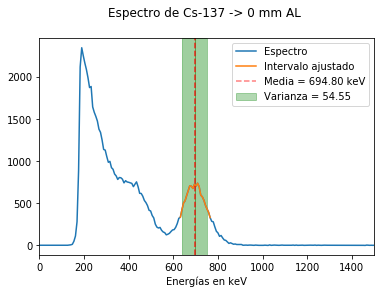

In [22]:
#Absorbente de aluminio 0 mm

plt.figure()

plt.title('Espectro de Cs-137 -> 0 mm AL \n')

plt.plot(energias, espectro_Cesio0mmAl, label = 'Espectro')
plt.plot(energias[90:110], espectro_Cesio0mmAl[90:110], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[90:110] ,espectro_Cesio0mmAl[90:110], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu,linestyle='--', color = 'red', alpha = 0.5)
plt.axvspan(mu - sigma, mu + sigma , facecolor='g', alpha=0.1)

plt.xlabel('Energías en keV')

area_0mm = np.sqrt(2*np.pi)*a*np.abs(sigma)

plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_0mm))

La energía medida para el fotopico es 674.87 keV con una varianza de 53.37 keV
La altura del fotopico en su valor medio es a = 695.41
El área de la gaussiana que ajusta el fotopico es 93024.20


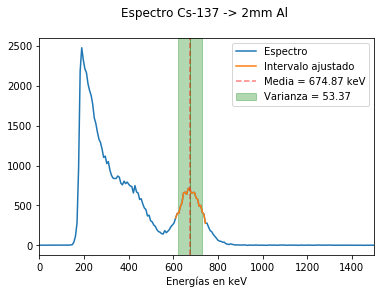

In [23]:
#Absorbente de aluminio 2 mm

plt.figure()

plt.title('Espectro Cs-137 -> 2mm Al \n')

plt.plot(energias, espectro_Cesio2mmAl, label = 'Espectro')
plt.plot(energias[87:107], espectro_Cesio2mmAl[87:107], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[87:107] ,espectro_Cesio2mmAl[87:107], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()

plt.xlabel('Energías en keV')

area_2mm = np.sqrt(2*np.pi)*a*np.abs(sigma)

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_2mm))

plt.savefig('FotopicoCesio2mmAl')

La energía medida para el fotopico es 671.68 keV con una varianza de 52.65 keV
La altura del fotopico en su valor medio es a = 702.71
El área de la gaussiana que ajusta el fotopico es 92737.51


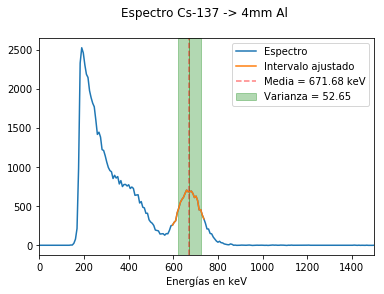

In [24]:
#Absorbente de aluminio 4 mm

plt.figure()

plt.title('Espectro Cs-137 -> 4mm Al \n')

plt.plot(energias, espectro_Cesio4mmAl, label = 'Espectro')
plt.plot(energias[85:106], espectro_Cesio4mmAl[85:106], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[85:106] ,espectro_Cesio4mmAl[85:106], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()

plt.xlabel('Energías en keV')

area_4mm = np.sqrt(2*np.pi)*a*np.abs(sigma)

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_4mm))

plt.savefig('FotopicoCesio4mmAl')

La energía medida para el fotopico es 662.31 keV con una varianza de 52.23 keV
La altura del fotopico en su valor medio es a = 694.82
El área de la gaussiana que ajusta el fotopico es 90960.26


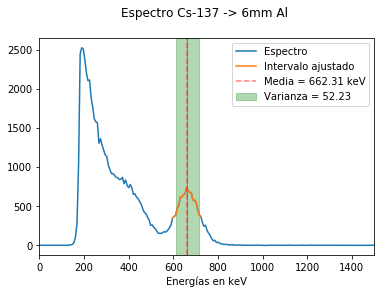

In [25]:
#Absorbente de aluminio 6 mm

plt.figure()

plt.title('Espectro Cs-137 -> 6mm Al \n')

plt.plot(energias, espectro_Cesio6mmAl, label = 'Espectro')
plt.plot(energias[85:104], espectro_Cesio6mmAl[85:104], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[85:104] ,espectro_Cesio6mmAl[85:104], p0=[800, 660, 30])
a, mu, sigma = params



plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()


plt.xlabel('Energías en keV')

area_6mm = np.sqrt(2*np.pi)*a*np.abs(sigma)

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_6mm))

plt.savefig('FotopicoCesio6mmAl')

La energía medida para el fotopico es 663.89 keV con una varianza de 51.63 keV
La altura del fotopico en su valor medio es a = 673.73
El área de la gaussiana que ajusta el fotopico es 87191.10


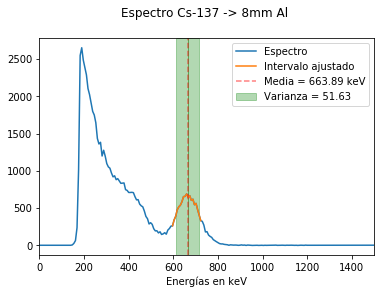

In [26]:
#Absorbente de aluminio 8 mm

plt.figure()

plt.title('Espectro Cs-137 -> 8mm Al \n')

plt.plot(energias, espectro_Cesio8mmAl, label = 'Espectro')
plt.plot(energias[85:104], espectro_Cesio8mmAl[85:104], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[85:104] ,espectro_Cesio8mmAl[85:104], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()


plt.xlabel('Energías en keV')

area_8mm = np.sqrt(2*np.pi)*a*np.abs(sigma)

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_8mm))

plt.savefig('FotopicoCesio8mmAl')

In [27]:
#Cargamos la función con la que vamos a ajustar los datos con una recta

def recta(x, x0, pte):
    return x0 + pte*x

El coeficiente de atenuación lineal (pte) es 0.14 cm^-1


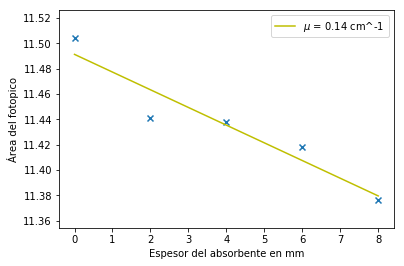

In [28]:
espesor = np.array([0,2,4,6,8])
area = np.log(np.array([area_0mm, area_2mm, area_4mm, area_6mm, area_8mm]))
x = np.linspace(0,8, 1000)

params, params_covariance = optimize.curve_fit(recta,espesor ,area, p0=[100000, 2000])
x0, pte = params

plt.scatter(espesor, area, marker= 'x')
plt.plot(x, x0 + pte*x , 'y', label = '$\mu$ = {:.2f} cm^-1'.format(-pte*10))
plt.legend()

plt.xlabel('Espesor del absorbente en mm')
plt.ylabel('Área del fotopico')
print('El coeficiente de atenuación lineal (pte) es {:.2f} cm^-1'.format(-pte*10))

plt.savefig('AtenuacionAluminio')

In [50]:
params_recta = np.polyfit(espesor, area, 1, cov=True)
print(10*params_recta[0])
print('Error asociado a la pendiente es {}'.format(np.sqrt(10*params_recta[1][0,0]) + np.sqrt(10*params_recta[1][1,1])))

error_coef_al = np.sqrt(10*params_recta[1][0,0]) + np.sqrt(10*params_recta[1][1,1])

disp_sigma_al = error_coef_al/(6.03*10*22)

print(disp_sigma_al)

[ -0.1396698  114.91165462]
Error asociado a la pendiente es 0.08440607924149145
6.362587007499732e-05


La sección eficaz en este regimen de energías la obtendremos como

                    sigma = mu/N
               
donde mu es el coeficiente de atenuación lineal I = I0*exp(mu*x) que se obtiene como la pendiente de la recta y N es el número de átomos por unidad de volumen (tiene unidad de cm^-3) y se ha calculado para el ALUMINIO como

densidad del aluminio = 2.7 g/cm^3

masa atómica del aluminio = 26.9815 g/mol

Numero de Avogadro = 6.022*10^23

N = 2.7x6.022x10^23/26.9815 = 6.02613*10^22 atomos/cm^3

In [29]:
N = 2.76*(6.022*10**23)/26.9815
print(N)
seccion_eficaz = 10*np.abs(pte)/N

print('La sección eficaz en este rango de energías es {:.30f} cm^2'.format(seccion_eficaz))

6.160042992420733e+22
La sección eficaz en este rango de energías es 0.000000000000000000000002267351 cm^2


# Absorbente: PLOMO

In [30]:
#Carga de los datos

espectro_Cesio0mmPb = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Csnoabsorbente.txt')
espectro_Cesio0mmPb = espectro_Cesio0mmPb['0'] - background['0']

espectro_Cesio2mmPb = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Cs2mmPl.txt')
espectro_Cesio2mmPb = espectro_Cesio2mmPb['0'] - background['0']

espectro_Cesio4mmPb = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Cs4mmPl.txt')
espectro_Cesio4mmPb = espectro_Cesio4mmPb['0'] - background['0']

espectro_Cesio6mmPb = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Cs6mmPl.txt')
espectro_Cesio6mmPb = espectro_Cesio6mmPb['0'] - background['0']

espectro_Cesio8mmPb = ascii.read('/home/davsan06/Documentos/PrácticasASTROPARTÍCULAS/EspectroscopíaRayosGamma/Espectros15marzo/Cs8mmPl.txt')
espectro_Cesio8mmPb = espectro_Cesio8mmPb['0'] - background['0']

La energía medida para el fotopico es 694.80 keV con una varianza de 54.55 keV
La altura del fotopico en su valor medio es a = 725.12
El área de la gaussiana que ajusta el fotopico es 99142.04


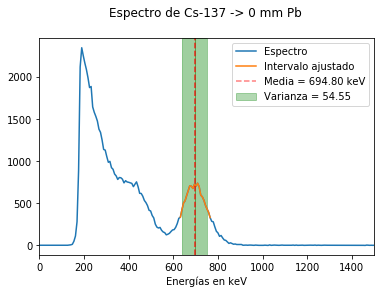

In [31]:
#Absorbente de plomo 0 mm

plt.figure()

plt.title('Espectro de Cs-137 -> 0 mm Pb \n')

plt.plot(energias, espectro_Cesio0mmPb, label = 'Espectro')
plt.plot(energias[90:110], espectro_Cesio0mmPb[90:110], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[90:110] ,espectro_Cesio0mmPb[90:110], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu,linestyle='--', color = 'red', alpha = 0.5)
plt.axvspan(mu - sigma, mu + sigma , facecolor='g', alpha=0.1)

plt.xlabel('Energías en keV')

area_0mm_Pb = np.sqrt(2*np.pi)*a*np.abs(sigma)

plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_0mm_Pb))

La energía medida para el fotopico es 694.84 keV con una varianza de 54.14 keV
La altura del fotopico en su valor medio es a = 729.01
El área de la gaussiana que ajusta el fotopico es 98931.44


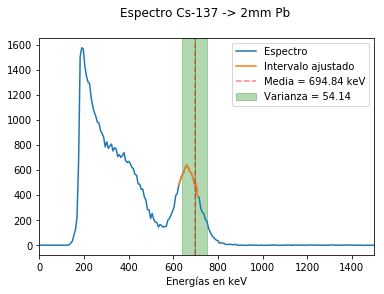

In [32]:
#Absorbente de plomo 2 mm

plt.figure()

plt.title('Espectro Cs-137 -> 2mm Pb \n')

plt.plot(energias, espectro_Cesio2mmPb, label = 'Espectro')
plt.plot(energias[89:102], espectro_Cesio2mmPb[89:102], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[89:102] ,espectro_Cesio0mmPb[89:102], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()

plt.xlabel('Energías en keV')

area_2mm_Pb = np.sqrt(2*np.pi)*a*np.abs(sigma)

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_2mm_Pb))

plt.savefig('FotopicoCesio2mmPb')

La energía medida para el fotopico es 657.75 keV con una varianza de 52.54 keV
La altura del fotopico en su valor medio es a = 486.80
El área de la gaussiana que ajusta el fotopico es 64114.65


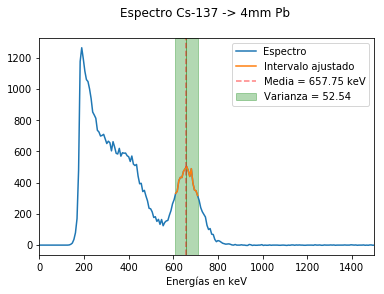

In [33]:
#Absorbente de plomo 4 mm

plt.figure()

plt.title('Espectro Cs-137 -> 4mm Pb \n')

plt.plot(energias, espectro_Cesio4mmPb, label = 'Espectro')
plt.plot(energias[87:102], espectro_Cesio4mmPb[87:102], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[87:102] ,espectro_Cesio4mmPb[87:102], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()

plt.xlabel('Energías en keV')

area_4mm_Pb = np.sqrt(2*np.pi)*a*np.abs(sigma)

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_4mm_Pb))

plt.savefig('FotopicoCesio4mmPb')

La energía medida para el fotopico es 639.21 keV con una varianza de 52.01 keV
La altura del fotopico en su valor medio es a = 420.01
El área de la gaussiana que ajusta el fotopico es 54758.08


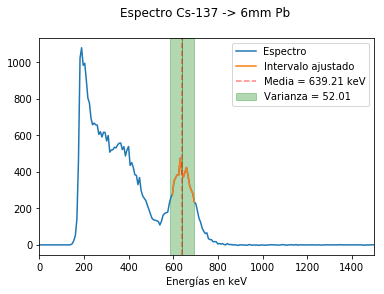

In [34]:
#Absorbente de plomo 6 mm

plt.figure()

plt.title('Espectro Cs-137 -> 6mm Pb \n')

plt.plot(energias, espectro_Cesio6mmPb, label = 'Espectro')
plt.plot(energias[85:100], espectro_Cesio6mmPb[85:100], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[85:100] ,espectro_Cesio6mmPb[85:100], p0=[800, 660, 30])
a, mu, sigma = params



plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()


plt.xlabel('Energías en keV')

area_6mm_Pb = np.sqrt(2*np.pi)*a*np.abs(sigma)

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_6mm_Pb))

plt.savefig('FotopicoCesio6mmPb')

La energía medida para el fotopico es 650.72 keV con una varianza de 54.74 keV
La altura del fotopico en su valor medio es a = 339.07
El área de la gaussiana que ajusta el fotopico es 46527.16


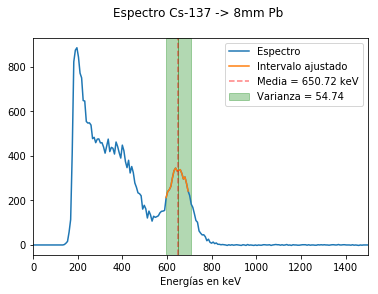

In [35]:
#Absorbente de plomo 8 mm

plt.figure()

plt.title('Espectro Cs-137 -> 8mm Pb \n')

plt.plot(energias, espectro_Cesio8mmPb, label = 'Espectro')
plt.plot(energias[85:100], espectro_Cesio8mmPb[85:100], label = 'Intervalo ajustado')

plt.xlim(0,1500)

#Ajuste del fotopico

params, params_covariance = optimize.curve_fit(test_func,energias[85:100] ,espectro_Cesio8mmPb[85:100], p0=[800, 660, 30])
a, mu, sigma = params


plt.axvline(mu, alpha = 0.5, linestyle='--', color = 'red', label = 'Media = {:.2f} keV'.format(mu))
plt.axvspan(mu-sigma,mu, alpha = 0.3, color = 'green', label = 'Varianza = {:.2f}'.format(sigma))
plt.axvspan(mu,mu+sigma, alpha = 0.3, color = 'green' )
plt.legend()


plt.xlabel('Energías en keV')

area_8mm_Pb = np.sqrt(2*np.pi)*a*np.abs(sigma)

print('La energía medida para el fotopico es {:.2f} keV con una varianza de {:.2f} keV'.format(mu,sigma))
print('La altura del fotopico en su valor medio es a = {:.2f}'.format(a))
print('El área de la gaussiana que ajusta el fotopico es {:.2f}'.format(area_8mm_Pb))

plt.savefig('FotopicoCesio8mmPb')

El coeficiente de atenuación lineal (pte) es 1.05 cm^-1


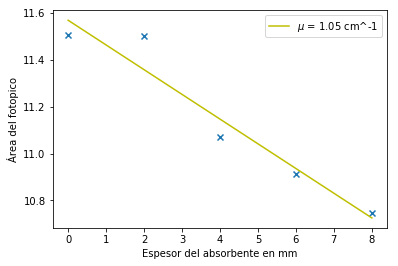

In [36]:
espesor = np.array([0,2,4,6,8])
area_Pb = np.log(np.array([area_0mm_Pb, area_2mm_Pb, area_4mm_Pb, area_6mm_Pb, area_8mm_Pb]))
x = np.linspace(0,8, 1000)

params, params_covariance = optimize.curve_fit(recta,espesor ,area_Pb, p0=[100000, 2000])
x0, pte = params

plt.scatter(espesor, area_Pb, marker= 'x')
plt.plot(x, x0 + pte*x , 'y', label = '$\mu$ = {:.2f} cm^-1'.format(-pte*10))
plt.legend()

plt.xlabel('Espesor del absorbente en mm')
plt.ylabel('Área del fotopico')
print('El coeficiente de atenuación lineal (pte) es {:.2f} cm^-1'.format(-pte*10))

plt.savefig('AtenuacionPlomo')

La sección eficaz en este regimen de energías la obtendremos como

                    sigma = mu/N
               
donde mu es el coeficiente de atenuación lineal I = I0*exp(mu*x) que se obtiene como la pendiente de la recta y N es el número de átomos por unidad de volumen (tiene unidad de cm^-3) y se ha calculado para el PLOMO como

densidad del aluminio = 11.3 g/cm^3

masa atómica del aluminio = 207.19 g/mol

Numero de Avogadro = 6.022*10^23

In [37]:
N_Pb = 11.3*(6.022*10**23)/207.19 
N_Pb

3.28435735315411e+22

In [38]:
seccion_eficaz_Pb = 10*np.abs(pte)/N_Pb

print('La sección eficaz en este rango de energías es {:.30f} cm^2'.format(seccion_eficaz_Pb))

La sección eficaz en este rango de energías es 0.000000000000000000000032038793 cm^2


In [39]:
seccion_eficaz_Pb_barn = seccion_eficaz_Pb*10**24
print('La sección eficaz en este rango de energías es {:.2f} barn'.format(seccion_eficaz_Pb_barn))

La sección eficaz en este rango de energías es 32.04 barn


In [51]:
params_recta_pb = np.polyfit(espesor, area_Pb, 1, cov=True)
print(10*params_recta[0])
print('Error asociado a la pendiente es {}'.format(np.sqrt(10*params_recta_pb[1][0,0]) + np.sqrt(10*params_recta_pb[1][1,1])))

error_coef_pb = np.sqrt(10*params_recta_pb[1][0,0]) + np.sqrt(10*params_recta_pb[1][1,1])

disp_sigma_pb = error_coef_al/(N_Pb)

print(disp_sigma_al)

[ -0.1396698  114.91165462]
Error asociado a la pendiente es 0.5301216912526726
6.362587007499732e-05
